# Text Mining - project 2
Karolina Tatarczyk 

In [ ]:
#!pip install -U nltk
#!pip install tabulate

In [ ]:
#pip install tensorflow

## Imports

Below are all the imports needed for text mining.

In [1]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn import metrics, __all__
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import tensorflow as tf

import sklearn as sk
from sklearn.neural_network import MLPClassifier

# Preparing for data cleaning

### Stop words
This function is used to remove stop words from the text. Stop words are words that are very common and of little meaning (e.g. conjunctions) that do not affect the identification of the document.

In the function at the beginning, a list of stop words, already implemented in python, was retrieved in English. Each word from the text is then analysed. It is added to the cleaned list in case the word is not in the list containing stop words.

In [3]:
def stopwords_function(text: str) -> str:

    stop_words = stopwords.words('english')
    #word_token = word_tokenize(text)
    cleaned = [w for w in text if w not in stop_words]
    return " ".join(cleaned)

### Stemming
The following feature shows the process of removing the inflectional ending from a word leaving only the subject of the word. The process of removing endings has already been implemented in python. Therefore, a ready-made function was used.

The text is converted to a list. Each subsequent sentence is then subjected to stemming. A list of consecutive words stemmed to the subject is returned.

In [4]:
def stemming_function(text: str) -> list:
    stemming = PorterStemmer()
    txt_list = list(text.split(" "))
    stemmed_txt = []
    for w in txt_list:
        stemmed_txt.append(stemming.stem(w))
    return stemmed_txt

### Text cleaning
The text must be cleared of unnecessary characters before analysis. This is why emoticons, numbers are removed - because we are analysing words, html commands, punctuation marks, whitespace characters here. All characters are also changed to lower case.

In [5]:
def clean_text(txt: str) -> str:
    find_emoticons = re.findall(r"[:;][-]?[/\|\)\(><D]", txt)
    txt_low = txt.lower()
    delete_numbers = re.sub("[0-9]+", "", txt_low)
    delete_html = re.sub(r'<.*?>', '', delete_numbers)
    delete_punctuation = re.sub(r"[^\w\s]", " ", delete_html)
    delete_whitespace = delete_punctuation.strip()
    clean_txt = delete_whitespace + ' '.join(find_emoticons)
    return clean_txt

### Text tokenizer
In the text_tokeniser, the text undergoes cleaning using a previously implemented and described function. This is followed by tokenisation - converting the text into a list of words. In the next step, the previously mentioned stopwords were removed.

In [6]:
def text_tokenizer(text: str):

    cleaned_text = clean_text(text)
    tokens = word_tokenize(cleaned_text)
    without_stopwords =stopwords_function(tokens)
    stemmed_text = stemming_function(without_stopwords)

    return [w for w in stemmed_text if len(w) > 3]

# Data loading

In [12]:
#import pandas as pd

dataset_titles = pd.read_csv('tweets_airline.csv', usecols=['text', 'airline_sentiment'])
#print(dataset_titles)
dataset_titles = dataset_titles.dropna()
sample=dataset_titles['text']
dataset_titles

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


# Data exploration

Distribution of movies depending on scores. 

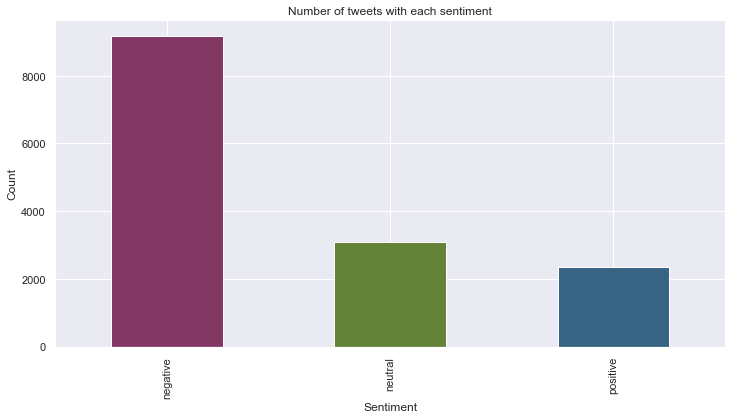

In [25]:
plt.figure(figsize=(12,6))
plt.title("Number of tweets with each sentiment")
colors = ['#833864','#648338','#386483']

dataset_titles['airline_sentiment'].value_counts().sort_index().plot.bar(color=colors)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Classifications

In [18]:
dataset_vector, dataset_titles_1 = vectorizing(dataset_titles['text'])

### Dividing into training and testing set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(dataset_titles['text'], dataset_titles['airline_sentiment'], test_size=0.33,
                                                    random_state=42)

X_train_vector, X_train_titles = vectorizing_voc(X_train, dataset_titles_1)
X_test_vector, X_test_titles = vectorizing_voc(X_test, dataset_titles_1)

### Decision Tree Classifier
A decision tree classifier works by creating a tree-like model of decisions, with each internal node representing a test on an attribute, each branch representing the outcome of the test, and each leaf node representing a class label. The goal is to split the data into smaller subsets, each containing similar instances, by making decisions based on the values of the input features.

The process of splitting continues until it reaches a stopping criterion, such as reaching a maximum depth or a minimum number of instances in a leaf node. The final output is a tree of decisions, where each path from the root to a leaf node represents a classification rule.

The decision tree classifier can be prone to overfitting, especially when the tree becomes too deep and complex.

Accuracy and heatmap representing the classification

Accuracy DTC: 0.6885347682119205


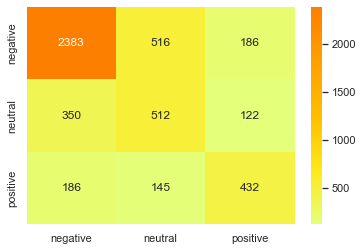

In [20]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_vector, y_train)
y_pred = DTC.predict(X_test_vector)
print("Accuracy DTC:", metrics.accuracy_score(y_test, y_pred))
uniform_data = np.random.rand(10, 12)
axis_labels = ["negative", "neutral", "positive"] 

# create seabvorn heatmap with required labels
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="Wistia",xticklabels=axis_labels, yticklabels=axis_labels,annot=True,fmt="d")

In [40]:
print(f'DTC model \n {classification_report(y_test, y_pred)}')

DTC model 
               precision    recall  f1-score   support

    negative       0.82      0.77      0.79      3085
     neutral       0.44      0.52      0.47       984
    positive       0.58      0.57      0.57       763

    accuracy                           0.69      4832
   macro avg       0.61      0.62      0.61      4832
weighted avg       0.70      0.69      0.69      4832



The accuracy of the classifier is 69%. The classifier most often correctly classifies negative comments, and consequently there is also the best precision for the decision attribute "Negative". However, it should be noted that the training set contains more than 3,000 records with the sentiment negative.

### Random Forest Classifier

Random forest classifier combines multiple decision trees, trained on different subsets of the data, to improve the overall performance and reduce overfitting.

The basic idea behind random forests is to create many decision trees using random subsets of the training data, and then aggregate their predictions to make the final decision. Each tree in the forest is trained using a different random subset of the data, and a different random subset of the features, which helps to reduce the correlation between the trees and increase the diversity of the ensemble.

In the prediction stage, the random forest classifier aggregates the predictions of all the trees by taking the majority vote for classification tasks.

In [21]:
RFC = RandomForestClassifier()
RFC.fit(X_train_vector, y_train)
y_pred = RFC.predict(X_test_vector)
print("Accuracy RFC:", metrics.accuracy_score(y_test, y_pred))

Accuracy RFC: 0.7642798013245033
Accuracy another way: 0.7642798013245033


RFC model 
               precision    recall  f1-score   support

    negative       0.83      0.88      0.85      3085
     neutral       0.57      0.51      0.54       984
    positive       0.72      0.62      0.66       763

    accuracy                           0.76      4832
   macro avg       0.70      0.67      0.68      4832
weighted avg       0.76      0.76      0.76      4832



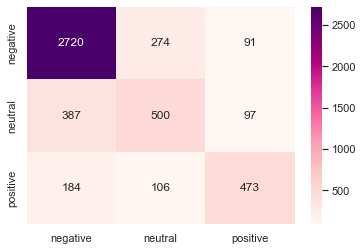

In [23]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",xticklabels=axis_labels, yticklabels=axis_labels,annot=True,fmt="d")
print(f'RFC model \n {classification_report(y_test, y_pred)}')

In this case, the precision is equal to 76%. Also in this classifier, negative comments were best classified with a precision of 83%.

### AdaBoost Classifier
AdaBoost (Adaptive Boosting) combines multiple "weak" classifiers to create a "strong" classifier that can make accurate predictions. The key idea behind AdaBoost is to give more weight to the samples that are difficult to classify, so that the weak classifiers can focus on the most important examples.

The training process starts with a weak classifier, such as a decision tree with a small depth, that is trained on the entire dataset. The misclassified samples are then given a higher weight, and a new weak classifier is trained on the updated weights. This process is repeated multiple times, with the weight of the misclassified samples being increased after each iteration. The final output is a combination of the weak classifiers, where each classifier is assigned a weight based on its accuracy.

AdaBoost is a simple and effective algorithm, it often produces better results than single weak classifiers, and it's relatively resistant to overfitting. 

It can be sensitive to noisy data and outliers, and it can also be affected by the choice of the weak classifier and the number of iterations. However, with the right choice of weak classifier and the appropriate parameter tuning, it can perform well in many classification tasks.

Accuracy ABC: 0.7195778145695364
ABC model 
               precision    recall  f1-score   support

    negative       0.80      0.84      0.82      3085
     neutral       0.47      0.41      0.44       984
    positive       0.67      0.62      0.64       763

    accuracy                           0.72      4832
   macro avg       0.65      0.62      0.63      4832
weighted avg       0.71      0.72      0.71      4832



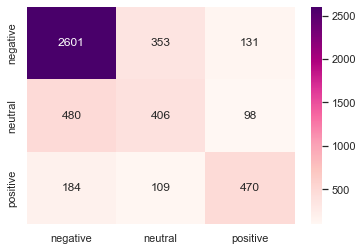

In [24]:
ABC = AdaBoostClassifier()
ABC.fit(X_train_vector, y_train)
y_pred = ABC.predict(X_test_vector)
print("Accuracy ABC:", metrics.accuracy_score(y_test, y_pred))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",xticklabels=axis_labels, yticklabels=axis_labels,annot=True,fmt="d")
print(f'ABC model \n {classification_report(y_test, y_pred)}')